# 김가네 팀플 (6) 소비 분석_ 230626
- 팀원 별로 분담해서 분석 진행
- feature의 중요도를 토대로 소비분석

- 원래 인사이트 도출하려고 했던 방안
- 저소득층의 문화 참여 방안을 고취할 수 있는 분석 결과 도출

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('mode.chained_assignment',  None)

In [6]:
# 머신러닝 완료된 데이터 파일 불러오기
CS_pred = pd.read_csv('CS_pred.csv', encoding='euc-kr')
CS_pred.info()
CS_pred

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       2144 non-null   int64
 1   where_cnt      2144 non-null   int64
 2   attend_cnt     2144 non-null   int64
 3   volunteer_cnt  2144 non-null   int64
 4   history_cnt    2144 non-null   int64
 5   festival_cnt   2144 non-null   int64
 6   standard       2144 non-null   int64
 7   block          2144 non-null   int64
 8   expense        2144 non-null   int64
 9   expense_f      2144 non-null   int64
 10  difficulty     2144 non-null   int64
 11  intention      2144 non-null   int64
 12  history        2144 non-null   int64
 13  history_f      2144 non-null   int64
 14  festival       2144 non-null   int64
 15  festival_f     2144 non-null   int64
 16  sex            2144 non-null   int64
 17  age            2144 non-null   int64
 18  education      2144 non-null   int64
 19  marrie

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,sex,age,education,married,work,income,sido,disabled,pred,target
0,49,0,0,0,5,0,1,1,14,14,...,2,5,3,1,5,3,1,1,3,3
1,3,3,3,0,1,0,2,6,14,9,...,2,5,3,2,5,7,1,1,1,1
2,22,15,0,0,0,0,2,2,14,14,...,2,5,4,3,1,5,1,1,2,2
3,10,0,0,0,2,2,2,4,17,11,...,1,5,4,2,1,6,1,1,2,2
4,7,0,0,0,0,0,3,2,15,12,...,2,5,3,2,1,5,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,21,0,0,0,0,0,5,4,12,12,...,1,5,4,2,1,3,9,1,2,2
2140,23,0,0,0,1,0,1,1,17,12,...,2,5,3,2,1,6,9,1,2,2
2141,30,1,0,0,1,0,4,1,8,8,...,2,6,2,2,3,4,9,1,3,3
2142,7,2,0,0,4,0,1,2,16,16,...,2,5,3,2,3,6,1,1,1,1


In [17]:
# 소비 데이터 전처리 완료된 데이터 파일 불러오기
CA = pd.read_csv('소비분석.csv', encoding='euc-kr')
CA.info()
CA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53597 entries, 0 to 53596
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                53597 non-null  int64  
 1   education          53597 non-null  int64  
 2   income             53597 non-null  int64  
 3   married            53597 non-null  int64  
 4   work               53597 non-null  int64  
 5   age                53597 non-null  int64  
 6   exhibition_price   4380 non-null   float64
 7   museum_price       5918 non-null   float64
 8   art_price          7349 non-null   float64
 9   traditional_price  18772 non-null  float64
 10  theater_price      9533 non-null   float64
 11  movie_price        22395 non-null  float64
 12  performance_price  4727 non-null   float64
 13  total_price        53597 non-null  int64  
dtypes: float64(7), int64(7)
memory usage: 5.7 MB


,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
0,1,3,6,2,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1,3,5,2,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1,4,6,2,3,3,NaN,NaN,NaN,NaN,NaN,30000.0,NaN,30000
3,2,4,6,2,4,3,40000.0,0.0,50000.0,NaN,NaN,20000.0,NaN,110000
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53592,2,4,3,1,1,3,NaN,NaN,100000.0,60000.0,40000.0,5000.0,50000.0,255000
53593,1,4,3,1,1,3,NaN,50000.0,600000.0,80000.0,50000.0,2000.0,50000.0,832000
53594,2,4,4,1,1,4,NaN,150000.0,80000.0,60000.0,50000.0,0.0,130000.0,470000
53595,1,4,3,1,3,4,NaN,NaN,10000.0,150000.0,NaN,NaN,90000.0,250000


In [18]:
# 모든 분야에서 null 값인 행 제거
CA.dropna(subset=['exhibition_price', 'museum_price', 'art_price', 'traditional_price', 'theater_price', 'movie_price', 'performance_price'],
          how='all',
          axis=0,
          inplace=True,
         )

In [19]:
# 소비분석 데이터 시니어 (50, 60대로 분류)
CA = CA[(CA['age']==5) | (CA['age']==6)]
CA

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53465,1,4,5,1,1,5,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,30000
53519,1,4,3,3,1,5,40000.0,NaN,NaN,30000.0,NaN,NaN,50000.0,120000
53550,1,3,1,1,3,5,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,15000
53557,2,4,5,1,1,5,NaN,NaN,0.0,60000.0,NaN,NaN,NaN,60000


In [71]:
CA

,sex,education,income,married,work,age,exhibition_price,museum_price,art_price,traditional_price,theater_price,movie_price,performance_price,total_price
4,2,3,6,3,1,6,0.0,NaN,NaN,NaN,NaN,50000.0,NaN,50000
8,1,3,6,2,1,5,NaN,NaN,NaN,NaN,NaN,20000.0,NaN,20000
9,2,3,6,2,1,5,NaN,NaN,NaN,NaN,20000.0,20000.0,NaN,40000
10,1,3,5,3,1,5,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0
19,2,3,5,2,1,5,0.0,NaN,NaN,NaN,NaN,10000.0,NaN,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53465,1,4,5,1,1,5,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,30000
53519,1,4,3,3,1,5,40000.0,NaN,NaN,30000.0,NaN,NaN,50000.0,120000
53550,1,3,1,1,3,5,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,15000
53557,2,4,5,1,1,5,NaN,NaN,0.0,60000.0,NaN,NaN,NaN,60000


## 그냥 가정하고 진행
- 참여도 별 소득, 학력의 특성 파악 -> 해당 특성을 가지고 있다면 평균 pivot table

## 머신러닝 결과 예측값을 도출하는데 사용된 feature importance 시각화 그래프
- 소비분석 데이터와 연계할 수 있는, 공통된 feature 중 TOP3 선정.
- 1위 : income
- 2위 : work
- 3위 : education

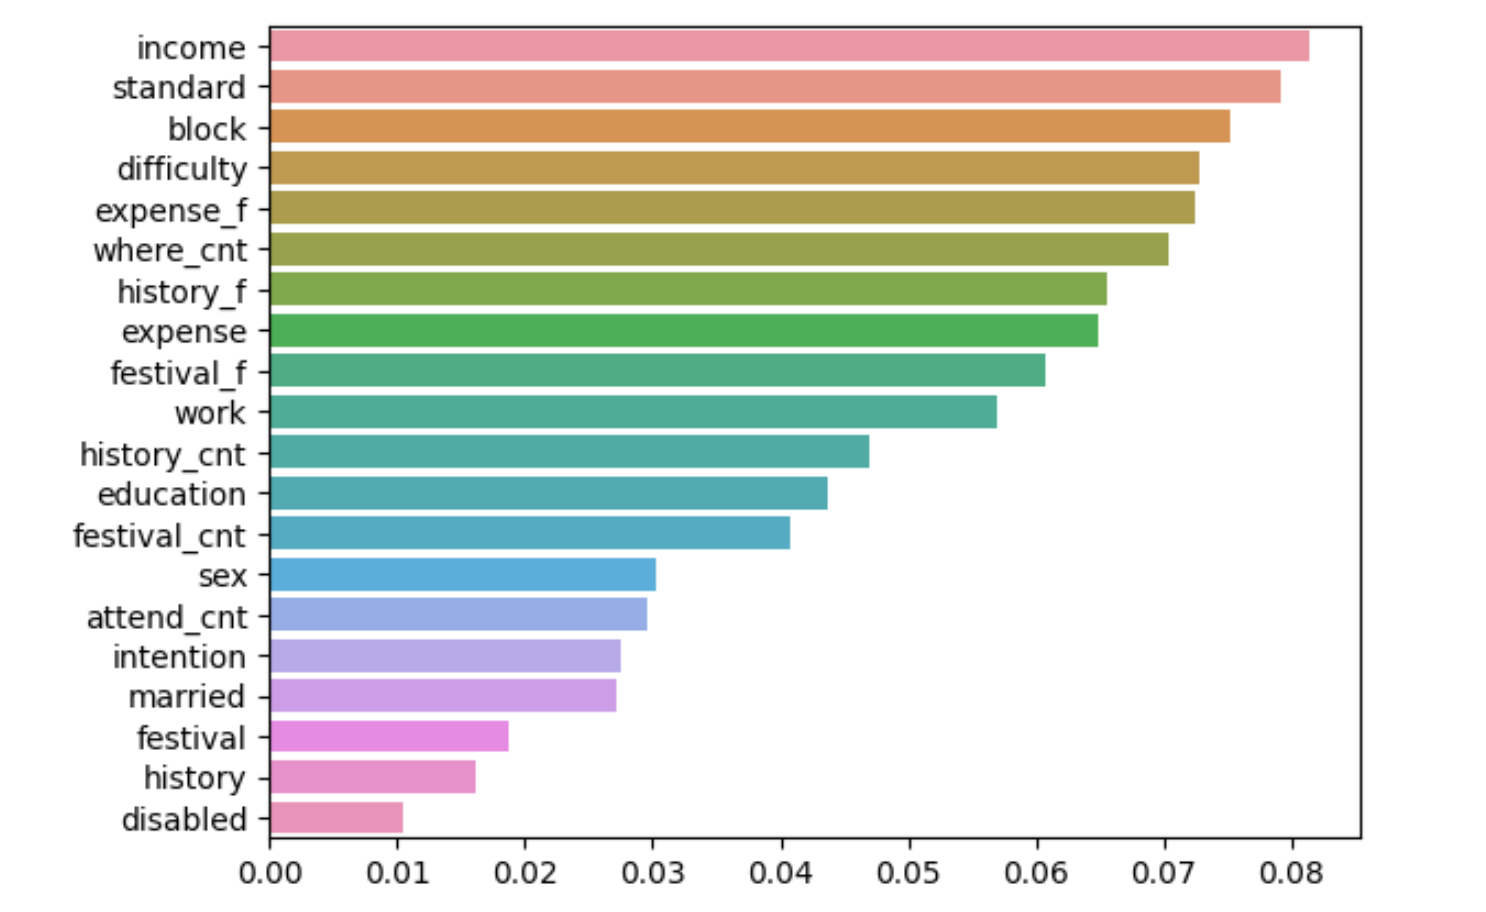

### 참여도가 높은 그룹 (범주 3에 해당) 분석

In [65]:
# 데이터셋 복사
CS = CS_pred.copy()

In [66]:
# 위의 중요도 top3 피쳐와 예측, 타겟 데이터 열만 남기기
CS = CS[['income', 'work', 'education', 'pred', 'target']]

In [67]:
# 참여도 높은 범주만 필터링
CS_3 = CS[CS['target']==3]

# 확인
CS_3

,income,work,education,pred,target
0,3,5,3,3,3
8,7,1,4,3,3
10,4,5,3,3,3
17,5,5,4,3,3
45,7,1,3,3,3
...,...,...,...,...,...
2107,2,5,3,3,3
2117,7,2,1,3,3
2119,6,3,3,3,3
2122,5,4,3,3,3


In [68]:
# 참여도 높은 범주만 필터링
CS_1 = CS[CS['target']==1]

# 확인
CS_1

,income,work,education,pred,target
1,7,5,3,1,1
4,5,1,3,1,1
7,5,3,3,1,1
18,5,1,4,1,1
24,4,2,3,2,1
...,...,...,...,...,...
2120,3,1,3,1,1
2135,5,1,3,1,1
2136,5,1,3,1,1
2142,6,3,3,1,1


<Axes: xlabel='income'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

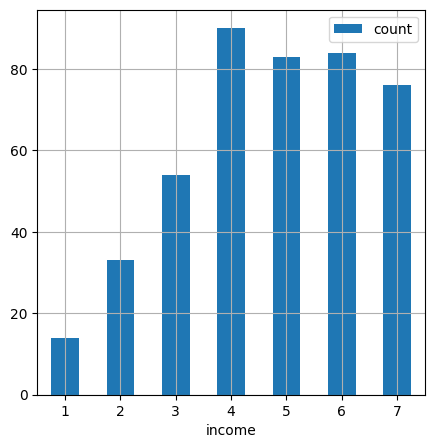

In [69]:
# 참여도가 높은 그룹의 소득 구간별 관측값의 개수 시각화
df = CS_3.income.value_counts().to_frame().sort_index()
df.plot(kind='bar', grid=True, figsize=(5,5))
plt.xticks(rotation='horizontal')
plt.show()

<Axes: xlabel='income'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

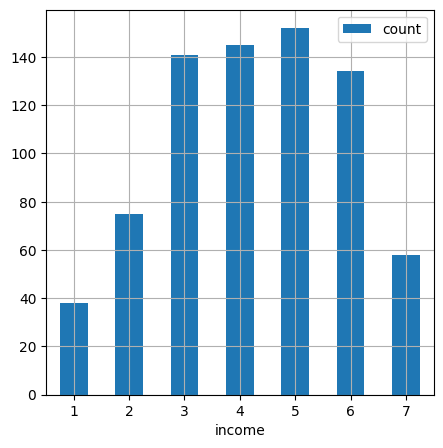

In [70]:
# 참여도가 낮은 그룹의 소득 구간별 관측값의 개수 시각화
df = CS_1.income.value_counts().to_frame().sort_index()
df.plot(kind='bar', grid=True, figsize=(5,5))
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
# 가장 높은 빈도를 가지는 4, 5, 6 소득 구간에 대해서 소비 데이터와 연계
# 4 : 300-400만원
# 5 : 400-500만원
# 6 : 500-600만원

<Axes: xlabel='income'>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7')])

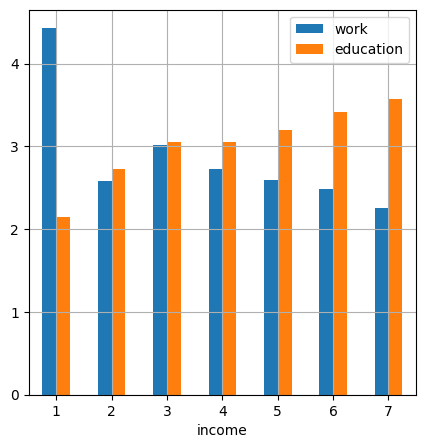

In [52]:
# 참여도가 높은 그룹의 소득별 종사상지위, 학력 열의 평균 시각화
df = CS.drop(columns=['target', 'pred'], axis=1).groupby('income').mean()
df.plot(kind='bar', grid=True, figsize=(5,5))
plt.xticks(rotation='horizontal')
plt.show()